# DA301: Advanced Analytics for Organisational Impact

### Main Assignment

**Introduction**

I will be using this Jupyter Notebook to produce the Python based data analysis for the assignment. Insights from the analysis will be recorded on this notebook alongside the analytical code snippet. A version of this notebook along with all associated datafiles have been uploaded into a special repo within my GitHub Page.

### What is GitHub?
- A free online resource for organising, storing and sharing code and related work with others.
- Cloud storage for any file type but is most often used for code files and related supporting documents.
- A platform to collaborate, network and pitch work amongst developers in real time.
- The most widely used version control system amongst developers and coders.

### How does GitHub add value?
- It has a built-in version control feature which can then be used to:
    - Track changes and those responsible for the changes. 
    - Create localised copy away from production version where upgrades or fixes can first be tested ahead of implementation.
    - Roll back to previous versions. 
- Version control is useful on collaborative projects where simultaneous work may be required.
- It can be used to track progressive performance of coders.
- As it is open source, projects can potentially draw upon resources of the entire community of coders.
- Provide a simple back up of work in the cloud asides from any local networks and hardware.

### Hyperlinking URL to My GitHub Repo

- All work & supporting materials relating to this Assignment can be found on my [GitHub Repo](https://github.com/SauravChakers/LSEDA301).

## Preparing the environment & Data Exploration

In [1]:
# Imports of Models & libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import nltk
import os
import string   
import re

from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
from nltk import PorterStemmer
from scipy.ndimage import gaussian_gradient_magnitude
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file(s).
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Check for missing Values, column names, shape of date set & data types.
reviews.info()

# 2000 rows & 11 columns of data.
# Data types identified.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Check for missing values.
reviews.isnull().sum()

# No missing values detected.

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [5]:
# Create summary of descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [6]:
# Drop redundant columns 'language' & 'platform'. 
# Not sure why these are deemed redundant but doing so per rubrics of assignment.
# Might revisit this later.
reviews = reviews.drop(['language','platform'], axis=1)

In [7]:
# Change selected column headings to make them easier to reference.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 
                                 'spending_score (1-100)': 'spending_score'})

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [8]:
# Save cleaned DataFrame as CSV file.
reviews.to_csv('reviews_cleanSC.csv')

# Call this base dataset.

In [9]:
# Sense check shape and metadata of new file.
# Load new file.
reviews_cleaned = pd.read_csv('reviews_cleanSC.csv')

# View metadata & shape.
reviews_cleaned.info()

# Columns dropped & renamed successfully.
# 2000 rows still & now 9 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


## Exploring possible linear relationships between variables

### Visual overview of correlations

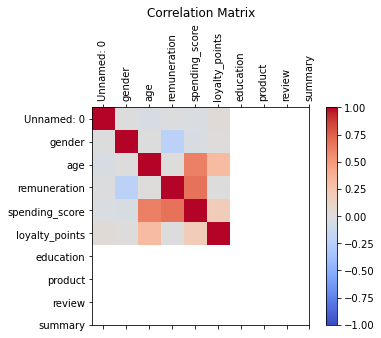

In [10]:
# Setting up the correlation matrix.
corr = reviews_cleaned.corr()

# Plotting the matrix.
fig = plt.figure()
ax = fig.add_subplot(111)

# Introducing heatmap.
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_title('Correlation Matrix')

# Setting up the display properties of the plot.
ticks = np.arange(0,len(reviews_cleaned.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(reviews_cleaned.columns)
ax.set_yticklabels(reviews_cleaned.columns)

# Visualise the correlation matrix.
plt.show()

# Can see some strength of correlation between the following:
# - spending_score & age
# - spending_score & remuneration

# Will investigate linear regression on these alongside the variables set out in the assignment task.

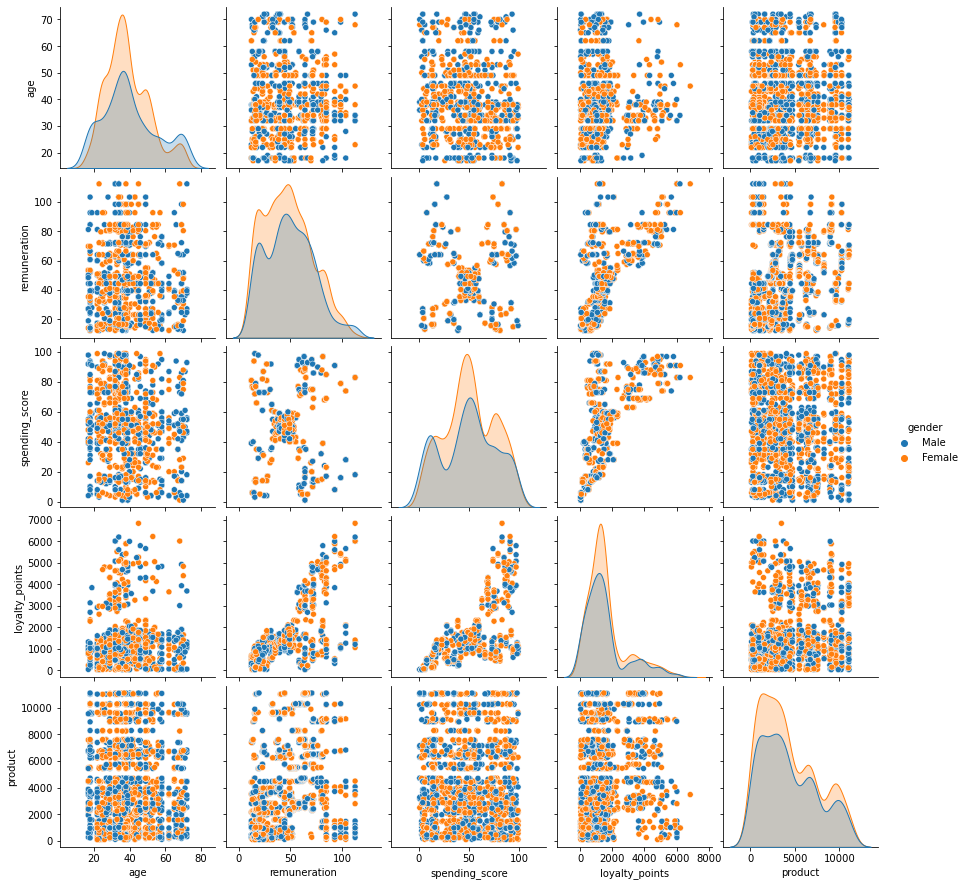

In [11]:
# Pairplot to visualise type of relationship between key numeric variables with each other.
# Segregated by gender.
var = reviews_cleaned[['age', 'remuneration', 'spending_score', 'loyalty_points', 'product']]

sns.pairplot(reviews_cleaned, vars=var, hue='gender')

# Many non-linear relationships.
# Many multi-modal distributions.

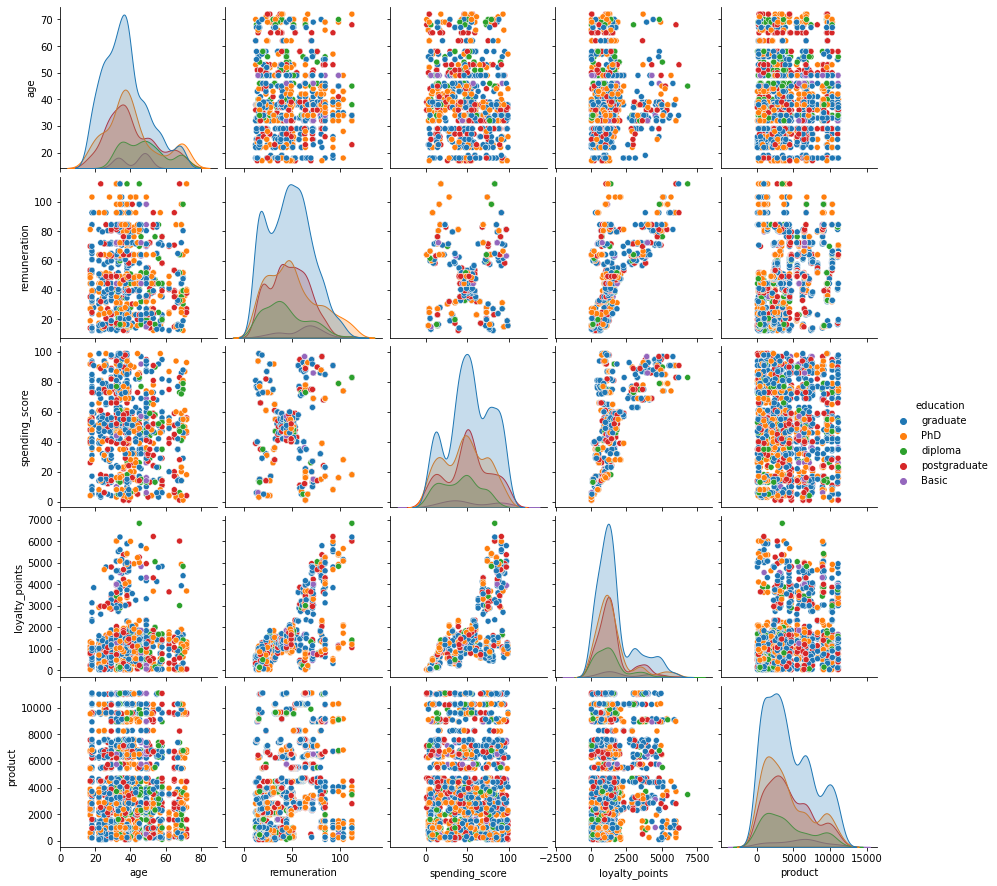

In [12]:
# Pairplot to visualise relationships between key numeric variables with each other.
# Segregated by education.
var = reviews_cleaned[['age', 'remuneration', 'spending_score', 'loyalty_points', 'product']]

sns.pairplot(reviews_cleaned, vars=var, hue='education')

# Too noisy due to excessive levels of segregation.

### Loyalty points & Age

In [13]:
# Dependent Variable.
y = reviews_cleaned['loyalty_points']

# Independent Variable.
x = reviews_cleaned['age']

# OLS model.
f = 'y ~ x'
test = ols(f, data=reviews_cleaned).fit()
print(test.summary())

# Very low R2; close to 0% linear relationship between these variables. 
# Also seen this in the Pearson's correlation matrix above.
# Correlation is weak between the selected variables.
# So variation in loyalty points not determined by age. 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 09 Sep 2022   Prob (F-statistic):             0.0577
Time:                        21:58:13   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.0

In [14]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [15]:
# Regression equation and table of predicted values based on equation.
# Setting the regression equation.
y_predicted = -4.012805*reviews_cleaned['age']+1736.517739

# View the table of predicted values.
y_predicted

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

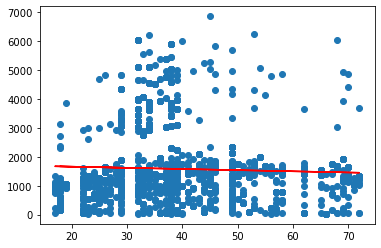

In [16]:
# Plot linear regression and regression line.
plt.scatter(x,y)
plt.plot(x, y_predicted, color='red') 
# Very poor fit.

### Loyalty points & Remuneration

In [17]:
# Dependent Variable.
y = reviews_cleaned['loyalty_points']

# Independent Variable.
x = reviews_cleaned['remuneration']

# OLS model.
f = 'y ~ x'
test = ols(f, data=reviews_cleaned).fit()
print(test.summary())

# Low R2 although relationship looks stronger here than age.
# 38% of change in loyalty points is determined by variations in remuneration.
# The x coefficient is statistically significant here give P>|t| = 0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        21:58:13   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.2

In [18]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [19]:
# Regression equation and generate table of predicted values based on equation.
# Setting the regression equation.
y_predicted = 34.187825*reviews_cleaned['remuneration']-65.686513

# View the table of predicted values.
y_predicted

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

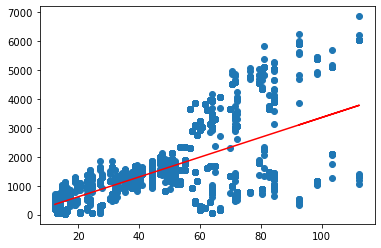

In [20]:
# Plot linear regression and regression line.
plt.scatter(x,y)
plt.plot(x, y_predicted, color='red') 

# Doesnt look like a great fit.

### Loyalty points & Spending score

In [21]:
# Dependent Variable.
y = reviews_cleaned['loyalty_points']

# Independent Variable.
x = reviews_cleaned['spending_score']

# OLS model.
f = 'y ~ x'
test = ols(f, data=reviews_cleaned).fit()
print(test.summary())

# Low R2 although relationship looks stronger here than both age & remuneration.
# 45.2% of changes in loyalty points can be explained by linear variations in spending score.
# X-coefficient is again statistically significant.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        21:58:14   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.1

In [22]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [23]:
# Regression equation and generate table of predicted values based on equation.
# Setting the regression equation.
y_predicted = 33.061693*reviews_cleaned['spending_score']-75.05263

# View the table of predicted values.
y_predicted

0       1214.353397
1       2602.944503
2        123.317528
3       2470.697731
4       1247.415090
           ...     
1995    2206.204187
1996     189.440914
1997    2933.561433
1998     453.934458
1999     189.440914
Name: spending_score, Length: 2000, dtype: float64

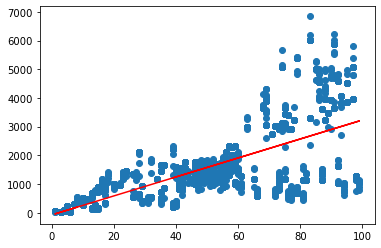

In [24]:
# Plot graph with regression line.
plt.scatter(x,y)
plt.plot(x, y_predicted, color='red') 

### Looking at stronger correlations identified in the Correlation Matrix

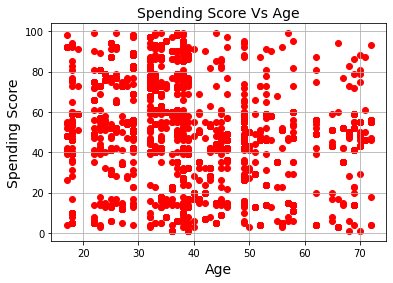

In [25]:
# The correlation matrix earlier showed that Age & Remuneration are potentially well correlated with spending score.
# Visualise the relationships in a scatter plot to check for linearity.
# Spending score vs Age.
plt.scatter(reviews_cleaned['age'], reviews_cleaned['spending_score'], color='red')
plt.title('Spending Score Vs Age', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.grid(True)
plt.show()

# Cant immediately visualise any strong linear relationship.

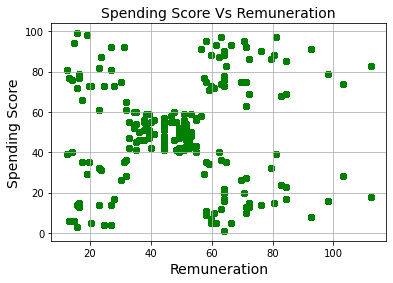

In [26]:
# Visualise the relationships in a scatter plot to check for linearity.
# Spending score vs Remuneration.
plt.scatter(reviews_cleaned['remuneration'], reviews_cleaned['spending_score'], color='green')
plt.title('Spending Score Vs Remuneration', fontsize=14)
plt.xlabel('Remuneration', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.grid(True)
plt.show()

# Again cant visualise any strong linear fits between the variables.

In [27]:
# Given there are more than one variable that we want to test we will run multiple linear regression.
X = reviews_cleaned[['remuneration','age']] 
# Here we have 2 variables for multiple regression. 
Y = reviews_cleaned['spending_score']
 
# with sklearn.
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels.
X = sm.add_constant(X) 
# adding a constant.
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

# Very low Adj R Squared.
# Means that changes in the variables together only explain 4.9% of the change in spending score.
# Prob of F-Stat indicates however that the variables are significant.
# None of the variables display particularly strong linear regressions.

Intercept: 
 66.79672478126022
Coefficients: 
 [ 0.00488861 -0.4312385 ]
                            OLS Regression Results                            
Dep. Variable:         spending_score   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     52.93
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           3.98e-23
Time:                        21:58:14   Log-Likelihood:                -9309.2
No. Observations:                2000   AIC:                         1.862e+04
Df Residuals:                    1997   BIC:                         1.864e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [28]:
# Test for multicollinearity with VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set independent Variables.
X = reviews_cleaned[['age', 'remuneration', 'spending_score', 'loyalty_points', 'product']]
  
# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
  
# Calculating VIF for each variable.
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# Display VIF output.
print(vif_data)

# All variables except 'product' display VIF > 5 which is considered strong.
# This suggests that most of the numeric variables have high levels of collinearity.
# Which means that the variables with high VIF are not really independent.

         variable       VIF
0             age  5.342662
1    remuneration  8.913604
2  spending_score  6.919920
3  loyalty_points  8.438183
4         product  3.136854


### Running Multiple Linear Regression (MLR) across all variables 

In [29]:
# Given there are many variables worth running MLR to get a global overview.
# Shows how the variables interract with each other.
X = reviews_cleaned[['age','remuneration','spending_score']] 
# Here we have all the numeric independent variables for multiple regression. 
y = reviews_cleaned['loyalty_points']
# Here  we have the target variable.

# Using sklearn.
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels.
X = sm.add_constant(X) 
# adding a constant.
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

# Much more significant output in terms of Adj R squared of 0.84.
# The increased number of variables will have clearly inflated the R output.
# We also know that there is strong multicollinearity amongst certain variables.
# With above in mind, questionable if MLR is appropriate choice of predictive tech.
# Strong P values except product.

Intercept: 
 -2203.0597513079
Coefficients: 
 [11.06065871 34.00838549 34.18319658]
                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:58:14   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [30]:
# Truncate Dataframe
reviews_revised = reviews_cleaned.drop(['product','review', 'summary', 'age', 'loyalty_points', 'education'], axis=1)

# Get metadata
reviews_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 62.6+ KB


In [31]:
# View Revised DataFrame
reviews_revised.head()

,Unnamed: 0,gender,remuneration,spending_score
0,0,Male,12.30,39
1,1,Male,12.30,81
2,2,Female,13.12,6
3,3,Female,13.12,77
4,4,Female,13.94,40


### Making predictions with clustering

We want to see if the existing data on variables remuneration and spending_score can be used to generate predictive capabilities that Turtle Games can use. 

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

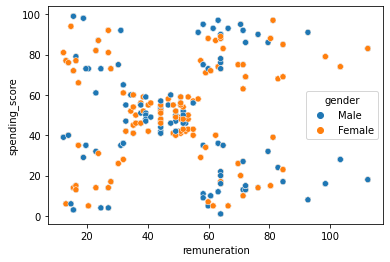

In [32]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score', data=reviews_revised, hue='gender')
# Kind of see 5 clusters of data but not sure.

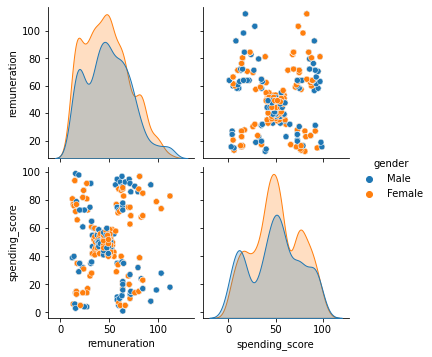

In [33]:
# Create a pairplot between variables with Seaborn.
x = reviews_revised[['remuneration', 'spending_score']]
sns.pairplot(reviews_revised, vars=x, hue='gender', diag_kind='kde')

# See that distribution of remuneration and spending_score are multi-modal across both genders
# See that peak spending score in women is significantly higher than its male equivalent
# Cant detect any strong evidence of correlations from the visualisations
# Difficult to clearly distinguish the number of clusters in both variables as above.

Improve the accuracy or visibility of the clusters

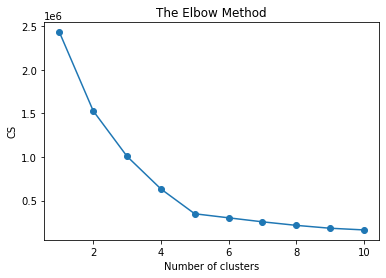

In [34]:
# Using the elbow method
# ELbow chart for us to decide on the optimal number of clusters
cs = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

# Looks like confirmation of 5 clusters as the elbow sits on 5.
# Worth double checking using the silhouette method.

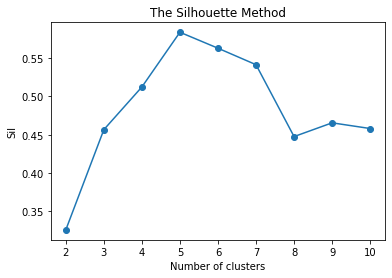

In [35]:
# Now try silhouette method
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

# Confirmed that there are 5 clusters.

Evaluate k-means model at different values of k

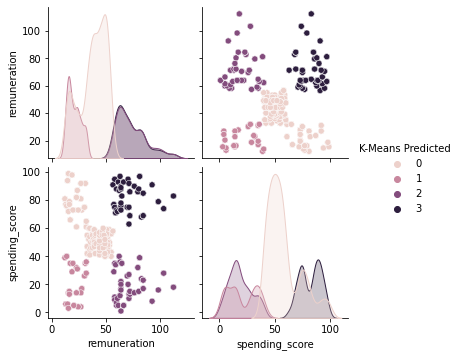

In [36]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [37]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

# Cluster 0 doesnt have the highest data point
# This confirms that the 4 is not the optimal value of k

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [38]:
#Visualising the clusters.
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# View the DataFrame.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

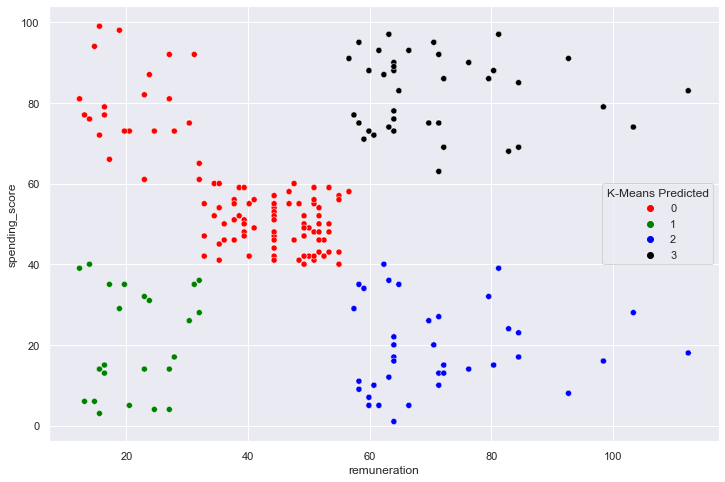

In [39]:
#Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y = 'spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

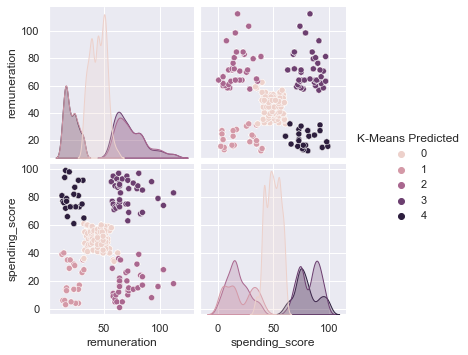

In [40]:
# Use 5 clusters.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [41]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

# Cluster 0 has the highest number of data points for k = 5
# Lets try k = 6 to see if Cluster 0 there is higher than 774. 
# Else will confirm k = 5 is the optimal value of k.

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [42]:
#Visualising the clusters.
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# View the DataFrame.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


Text(0.5, 1.0, 'Customer Segmentation by Spending Score & Remuneration')

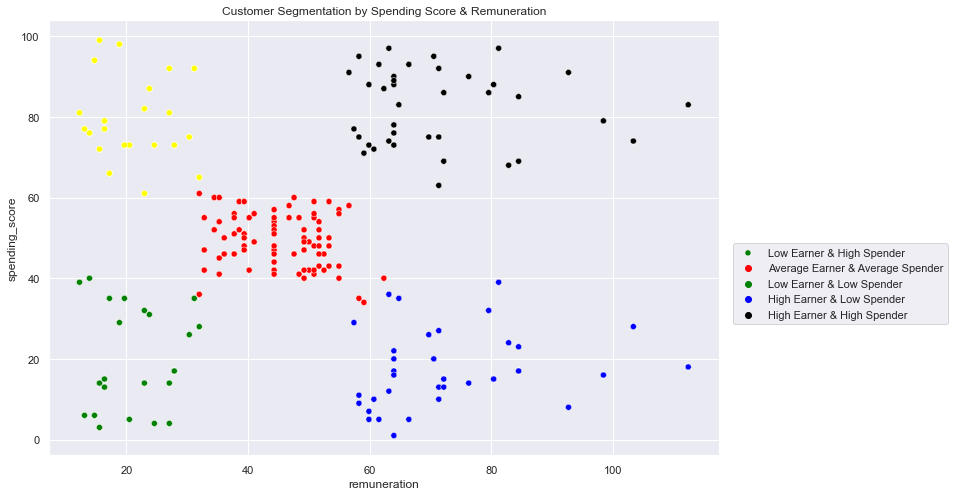

In [48]:
#Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y = 'spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'yellow'])
plt.legend(["Low Earner & High Spender", "Average Earner & Average Spender", "Low Earner & Low Spender",
           "High Earner & Low Spender", "High Earner & High Spender"], bbox_to_anchor=(1.35, 0.5), loc= 'upper right')
plt.title("Customer Segmentation by Spending Score & Remuneration")

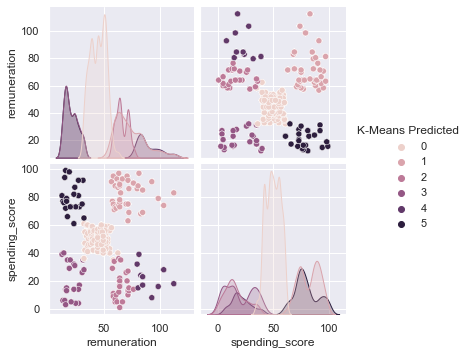

In [49]:
# Use 6 clusters.
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [50]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

# Cluster 0 has 767 data points when k = 6
# This is less than Cluster 0 data points when k = 5
# Confirms that optimal value of k = 5.

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [51]:
#Visualising the clusters.
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# View the DataFrame.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  5
2         13.12               6                  3
3         13.12              77                  5
4         13.94              40                  3


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

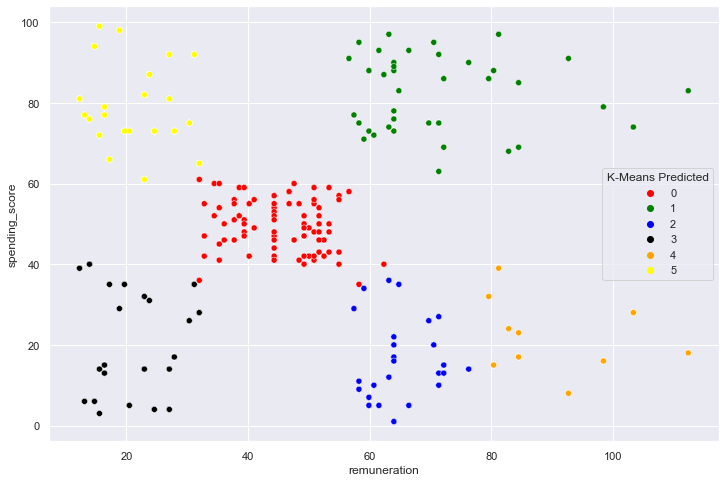

In [52]:
#Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y = 'spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'yellow'])

#### Final fit the of the model is k = 5 as this produces the highest number of data points in Cluster 0. 

This means that the customers are best classified in the following 5 groups:
- High earners and high spenders
- High earners and low spenders
- Average earners and average spenders
- Low earners and high spenders
- Low earners and low spenders

### Analyse Customer Sentiments with reviews using NLP in Python

In [53]:
# Lets pull up the base dataset again
# Load the data set.
cust_reviews = pd.read_csv('reviews_cleanSC.csv')

# View DataFrame.
cust_reviews.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [54]:
# Dropping redundant columns
cust_reviews = cust_reviews.drop(['remuneration','spending_score', 'product', 'education', 'loyalty_points',
                       'age', 'gender'], axis=1)

In [55]:
# Explore the revised Dataset
cust_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   review      2000 non-null   object
 2   summary     2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


#### Prepare the data for NLP in Python

In [56]:
# Store stopwords
STOPWORDS=stopwords.words("english")

In [57]:
# Defining function to remove emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [58]:
# Defining all pre-processing functions

def clean_text(text):
    ps=PorterStemmer()
    text=deEmojify(text)
    text_cleaned="".join([x for x in text if x not in string.punctuation])
    text_cleaned=re.sub(' +', ' ', text_cleaned)
    text_cleaned=text_cleaned.lower()
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS]
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    return text_cleaned

In [59]:
# Applying the pre-processing functions to review column
cust_reviews['review']=cust_reviews['review'].apply(lambda x:clean_text(x))

# View output
cust_reviews['review'].head

<bound method NDFrame.head of 0       come dm screen space screen absolut premium fa...
1       open letter galeforce9\n\nyour unpaint miniatu...
2       nice art nice print two panel fill gener forgo...
3                     amaz buy bought gift new dm perfect
4       review gf9 previou screen complet unnecessari ...
                              ...                        
1995    perfect word game mix age mom perhap give litt...
1996    great game think would like first receiv turn ...
1997                      great game all\nkeep mind nimbl
1998                                             fun game
1999    game fun lot like scrabbl without littl tile lose
Name: review, Length: 2000, dtype: object>

In [60]:
# Applying the pre-processing functions to summary column
cust_reviews['summary']=cust_reviews['summary'].apply(lambda x:clean_text(x))

# View output
cust_reviews['summary']

# There are numbers present which are incompatible with WordCloud
# Remove numbers to create WordCloud

0        fact 50 space wast art terribl inform need art 
1       anoth worthless dungeon master screen galeforce9
2                             pretti also pretti useless
3                                              five star
4                                             money trap
                              ...                       
1995                       perfect word game mix age mom
1996                                           super fun
1997                                          great game
1998                                           four star
1999                                           love game
Name: summary, Length: 2000, dtype: object

In [61]:
# Remove all occurring digits in columns with nothing
cust_reviews['review'] = cust_reviews['review'].str.replace('\d+', '')
cust_reviews['summary'] = cust_reviews['summary'].str.replace('\d+', '')

In [62]:
# Drop duplicates if any in both columns
cust_reviews = cust_reviews.drop_duplicates()

# View output
cust_reviews.info()

# No duplicates detected.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   review      2000 non-null   object
 2   summary     2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 62.5+ KB


In [63]:
# Tokenise Words in both columns
cust_reviews['review_tokens'] = cust_reviews['review'].apply(word_tokenize)
cust_reviews['summary_tokens'] = cust_reviews['summary'].apply(word_tokenize)

# View output
cust_reviews.head()

,Unnamed: 0,review,summary,review_tokens,summary_tokens
0,0,come dm screen space screen absolut premium fa...,fact space wast art terribl inform need art,"[come, dm, screen, space, screen, absolut, pre...","[fact, space, wast, art, terribl, inform, need..."
1,1,open letter galeforce\n\nyour unpaint miniatur...,anoth worthless dungeon master screen galeforce,"[open, letter, galeforce, your, unpaint, minia...","[anoth, worthless, dungeon, master, screen, ga..."
2,2,nice art nice print two panel fill gener forgo...,pretti also pretti useless,"[nice, art, nice, print, two, panel, fill, gen...","[pretti, also, pretti, useless]"
3,3,amaz buy bought gift new dm perfect,five star,"[amaz, buy, bought, gift, new, dm, perfect]","[five, star]"
4,4,review gf previou screen complet unnecessari n...,money trap,"[review, gf, previou, screen, complet, unneces...","[money, trap]"


In [64]:
# Define an empty list of tokens for review_tokens Column
rev_tokens = []

for i in range(cust_reviews.shape[0]):
    # Add each token to the list.
    rev_tokens = rev_tokens + cust_reviews['review_tokens'][i]

# View output
rev_tokens

['come',
 'dm',
 'screen',
 'space',
 'screen',
 'absolut',
 'premium',
 'fact',
 'space',
 'wast',
 'art',
 'terribl',
 'inform',
 'need',
 'art',
 'well',
 'make',
 'complet',
 'useless',
 'reason',
 'gave',
 'star',
 'technic',
 'speak',
 'least',
 'still',
 'stand',
 'block',
 'note',
 'dice',
 'roll',
 'drop',
 'ball',
 'complet',
 'open',
 'letter',
 'galeforce',
 'your',
 'unpaint',
 'miniatur',
 'bad',
 'spell',
 'card',
 'great',
 'board',
 'game',
 'meh',
 'dm',
 'screen',
 'howev',
 'freak',
 'terribl',
 'im',
 'still',
 'wait',
 'singl',
 'screen',
 'isnt',
 'pollut',
 'pointless',
 'artwork',
 'use',
 'referenc',
 'tabl',
 'youv',
 'creat',
 'singl',
 'use',
 'screen',
 'use',
 'run',
 'storm',
 'king',
 'thunder',
 'adventur',
 'even',
 'despit',
 'fact',
 'gear',
 'adventur',
 'path',
 'use',
 'neglig',
 'best',
 'massiv',
 'swath',
 'inner',
 'panel',
 'wast',
 'artwork',
 'bloat',
 'overland',
 'map',
 'could',
 'easili',
 'reduc',
 'singl',
 'panel',
 'size',
 'tabl',

In [65]:
# Create an empty string variable for each column
# This is required to generate WordCloud
# Review Column first
rev2_string = ''

for value in rev_tokens:
    # Add each filtered token word to the string.
    rev2_string = rev2_string + value + ' '

In [66]:
# Define an empty list of tokens for summary_tokens Column
sum_tokens = []

for i in range(cust_reviews.shape[0]):
    # Add each token to the list.
    sum_tokens = sum_tokens + cust_reviews['summary_tokens'][i]

# View output
sum_tokens

['fact',
 'space',
 'wast',
 'art',
 'terribl',
 'inform',
 'need',
 'art',
 'anoth',
 'worthless',
 'dungeon',
 'master',
 'screen',
 'galeforce',
 'pretti',
 'also',
 'pretti',
 'useless',
 'five',
 'star',
 'money',
 'trap',
 'five',
 'star',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'star',
 'great',
 'could',
 'even',
 'better',
 'anoth',
 'miss',
 'opportun',
 'valu',
 'add',
 'product',
 'line',
 'five',
 'star',
 'love',
 'map',
 'gener',
 'dm',
 'screen',
 'weak',
 'game',
 'fell',
 'complet',
 'flat',
 'five',
 'star',
 'good',
 'book',
 'buckley',
 'card',
 'mommer',
 'advanc',
 'good',
 'get',
 'better',
 'know',
 'your',
 'get',
 'dont',
 'bother',
 'worst',
 'valu',
 'ive',
 'ever',
 'seen',
 'enough',
 'product',
 'good',
 'product',
 'temporari',
 'tattoo',
 'good',
 'gift',
 'huge',
 'hit',
 'gorgeou',
 'pictur',
 'five',
 'star',
 'wonder',
 'design',
 'wow',
 'great',
 'color',
 'book',
 'nice',
 'book',
 'great',
 'pictur',
 'perfect',
 'well',
 'done',
 'relax'

In [67]:
# Create an empty string variable for each column
# This is required to generate WordCloud
# Summary Column now
sum2_string = ''

for value in sum_tokens:
    # Add each filtered token word to the string.
    sum2_string = sum2_string + value + ' '

In [68]:
# Create WordCloud for Reviews
text = rev2_string

# Load custom picture for WordCloud
ninja_turtle = np.array(Image.open('ninja.png'))

# subsample image for clarity
ninja_turtle = ninja_turtle[::3, ::3]

# create mask  white is "masked out"
ninja_turtle_mask = ninja_turtle.copy()
ninja_turtle_mask[ninja_turtle_mask.sum(axis=2) == 0] = 1000

# Enforce boundaries between colors for clarity.
edges = np.mean([gaussian_gradient_magnitude(ninja_turtle[:, :, i] / 1000, 2) for i in range(3)], axis=0)
ninja_turtle_mask[edges > .08] = 1000

# Generate Wordcloud
wc = WordCloud(background_color='white', max_words=300, mask=ninja_turtle_mask, max_font_size=40, random_state=42, 
               relative_scaling=0)


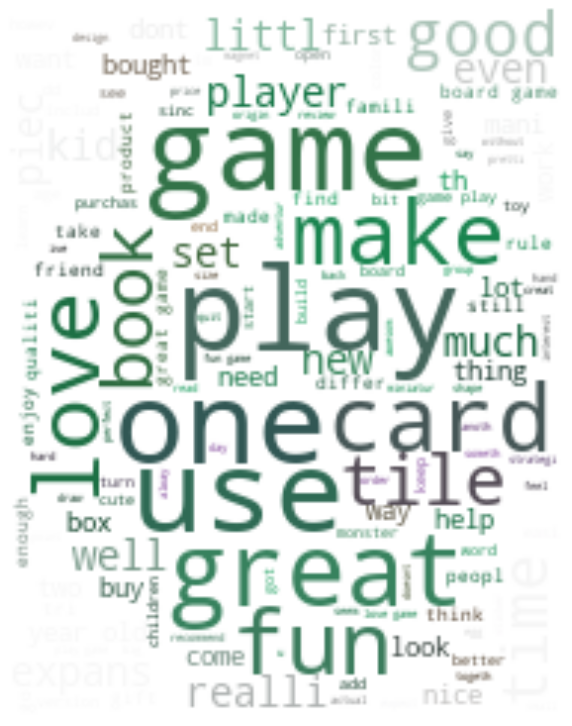

In [69]:
# Review: Display the WordCloud.
wc.generate(text)
image_colors = ImageColorGenerator(ninja_turtle)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 15))
plt.axis('off') 
plt.imshow(wc, interpolation="bilinear")
# Save as image for subsequent report.
wc.to_file("turtle_new_assignment.png")

In [70]:
# Create WordCloud for Summary
text = sum2_string

# Load custom picture for WordCloud
ninja_turtle = np.array(Image.open('turtle.png'))

# subsample image for clarity
ninja_turtle = ninja_turtle[::3, ::3]

# create mask  white is "masked out"
ninja_turtle_mask = ninja_turtle.copy()
ninja_turtle_mask[ninja_turtle_mask.sum(axis=2) == 0] = 1000

# Enforce boundaries between colors for clarity.
edges = np.mean([gaussian_gradient_magnitude(ninja_turtle[:, :, i] / 1000, 2) for i in range(3)], axis=0)
ninja_turtle_mask[edges > .08] = 1000

# Generate Wordcloud
wc = WordCloud(background_color='black', max_words=300, mask=ninja_turtle_mask, max_font_size=40, random_state=38, 
               relative_scaling=0)


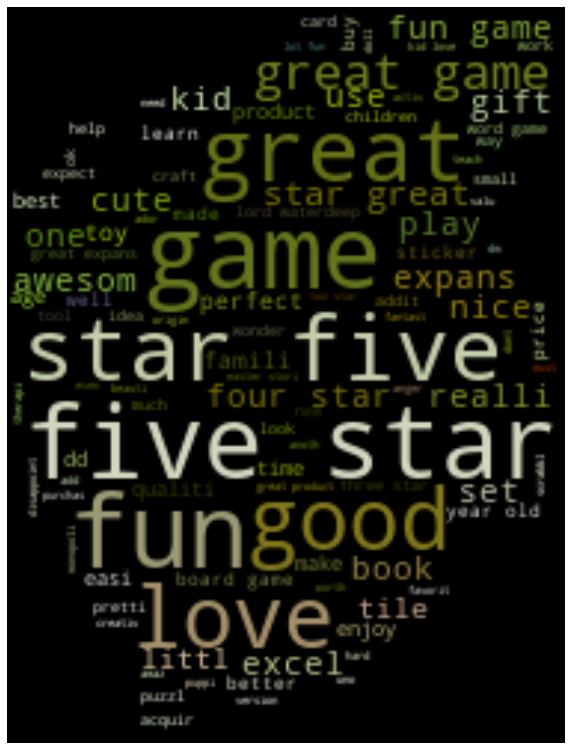

In [71]:
# Summary: Display the WordCloud.
wc.generate(text)
image_colors = ImageColorGenerator(ninja_turtle)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 15))
plt.axis('off') 
plt.imshow(wc, interpolation="bilinear")
# Save as image for subsequent report.
wc.to_file("turtle2_new_assignment.png")

#### Identify the 15 most common words & Polarity

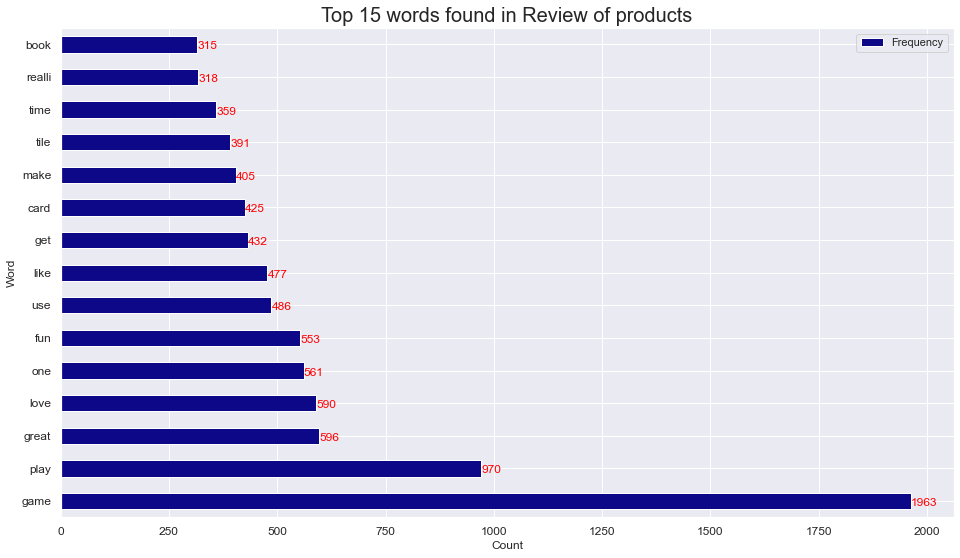

In [72]:
# Finding the 15 most common unique words used in Reviews
# Creating a DataFrame to contain the 15 most common unique words
counts = pd.DataFrame(Counter(rev_tokens).most_common(15),
columns=['Word', 'Frequency']).set_index('Word')

# Plotting the 15 most common words in Reviews
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap='plasma')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Top 15 words found in Review of products", fontsize=20)
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()),
                                                       2)), fontsize=12, color='red')

# Top 15 words are all either descriptive/nouns such as game and play or positive such as great and love.
# No negative words detected.

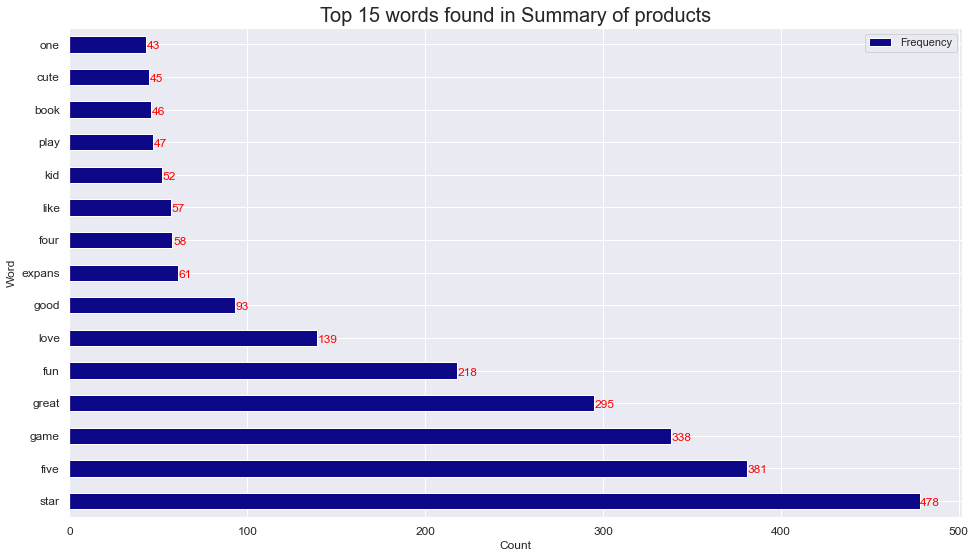

In [73]:
# Finding the 15 most common unique words used in Summary
# Creating a DataFrame to contain the 15 most common unique words
counts = pd.DataFrame(Counter(sum_tokens).most_common(15),
columns=['Word', 'Frequency']).set_index('Word')

# Plotting the 15 most common words in Summary
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap='plasma')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Top 15 words found in Summary of products", fontsize=20)
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()),
                                                       2)), fontsize=12, color='red')

# Again top 15 words are neutral/descriptive or positve such as fun and five star
# Only exception may be 'expans' which is 8th most popular. 
# This may have been tokenised from expensive which may be deemed negative.

### Calculating sentiment polarity in Reviews and Summary

In [74]:
# Setting up the Sentiment Analyser
analyser = SentimentIntensityAnalyzer()

In [75]:
# Defining function to classify sentiment
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [76]:
# Defining function to aggregate sentiment scores
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

In [77]:
# Applying the sentiment functions previously defined to Reviews
cust_reviews['reviews_sentiment_score']=cust_reviews['review_tokens'].apply(lambda x:compound_score(x))

In [78]:
# View sample output
cust_reviews.sample(5)

,Unnamed: 0,review,summary,review_tokens,summary_tokens,reviews_sentiment_score
774,774,well play game last night hous version aquir g...,like version,"[well, play, game, last, night, hous, version,...","[like, version]",0.0
498,498,client struggl anger manag need better cool sk...,everyon love,"[client, struggl, anger, manag, need, better, ...","[everyon, love]",0.0
1709,1709,like geometri might note ball whack rhombic tr...,look world anoth perspect,"[like, geometri, might, note, ball, whack, rho...","[look, world, anoth, perspect]",0.0
754,754,great product cardboard durabl thought would p...,good product,"[great, product, cardboard, durabl, thought, w...","[good, product]",0.0
586,586,sooo excit see easter stori egg come year give...,given star afar year ago inlaw love ad tradit ...,"[sooo, excit, see, easter, stori, egg, come, y...","[given, star, afar, year, ago, inlaw, love, ad...",0.0


In [79]:
# Labelling the sentiment
# Leaving all 0 sentiment scores to be defined as neutral
# Assigning postive sentiment to postive scores
# Assigning negative sentiment label to scores below 0
def sentiment_category(score):
    if score >= 0.01:
        return "positive"
    elif score <= -0.01:
        return "negative"
    else:
        return "neutral"

In [80]:
# Applying the sentiment categoriser
cust_reviews['review_sentiment']=cust_reviews['reviews_sentiment_score'].apply(lambda x:sentiment_category(x))

In [81]:
# View sample output
cust_reviews.sample(5)

,Unnamed: 0,review,summary,review_tokens,summary_tokens,reviews_sentiment_score,review_sentiment
920,920,play version aquir m game latest one thing co...,aquir rock,"[play, version, aquir, m, game, latest, one, t...","[aquir, rock]",0.0,neutral
267,267,set similar mani mani year ago spent lot time ...,klutz pompom puppi,"[set, similar, mani, mani, year, ago, spent, l...","[klutz, pompom, puppi]",0.0,neutral
587,587,love easter stori egg hardcov book beauti colo...,love easter stori egg,"[love, easter, stori, egg, hardcov, book, beau...","[love, easter, stori, egg]",0.0,neutral
1026,1026,brutal realli plan strateg win first adventur ...,brutal fun,"[brutal, realli, plan, strateg, win, first, ad...","[brutal, fun]",0.0,neutral
1644,1644,realli like book simpl statement facti dont kn...,look listen whole new way,"[realli, like, book, simpl, statement, facti, ...","[look, listen, whole, new, way]",0.0,neutral


In [82]:
# Display key stats
cust_reviews['reviews_sentiment_score'].describe()

# Overall, pretty neutral sentiment across all reviews with the mean being just above 0 at 0.0136  
# Best of postive sentiment (0.6369) is much stronger than the worst of negative sentiment (-0.3612) 

count    2000.000000
mean        0.013696
std         0.085725
min        -0.361200
25%         0.000000
50%         0.000000
75%         0.000000
max         0.636900
Name: reviews_sentiment_score, dtype: float64

In [83]:
# Seeing the sentiment of all the reviews
# Plotting Histogram to better view the distribution of reviews, whilst removing neutral reviews.
cust_reviews['reviews_sentiment_score'] = cust_reviews['reviews_sentiment_score'][cust_reviews['reviews_sentiment_score'] != 0]

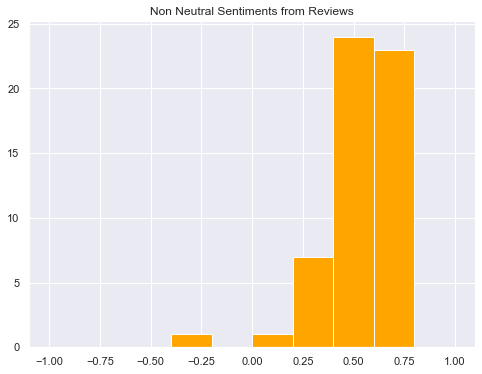

In [84]:
# Visualise the distribution of the sentiment analysis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values with break at 0
cust_reviews['reviews_sentiment_score'].hist(bins=[-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1],
             ax=ax,
             color="orange")

plt.title("Non Neutral Sentiments from Reviews")
plt.show()

# This is disappointing given out of 2000 reviews, only 65 or so reviews return non neutral sentiments

In [85]:
# Applying the sentiment functions previously defined to Summary
cust_reviews['summary_sentiment_score']=cust_reviews['summary_tokens'].apply(lambda x:compound_score(x))

In [86]:
# Labelling the sentiment
# Leaving all 0 sentiment scores to be defined as neutral
# Assigning postive sentiment to postive scores
# Assigning negative sentiment label to scores below 0
def sentiment_category(score):
    if score >= 0.01:
        return "positive"
    elif score <= -0.01:
        return "negative"
    else:
        return "neutral"

In [87]:
# Applying the sentiment categoriser
cust_reviews['summary_sentiment']=cust_reviews['summary_sentiment_score'].apply(lambda x:sentiment_category(x))

In [88]:
# Display key stats
cust_reviews['summary_sentiment_score'].describe()

# Overall, almost equally neutral sentiment across all summaries with the average at 0.0234
# This is slightly more positive than the sentiment of reviews but only very marginally so.
# Again the best of postive sentiment is much stronger than the worst of negative sentiment. 
# Both extreme sentiments are more or less equal to their equivalent in reviews.

count    2000.000000
mean        0.024321
std         0.119580
min        -0.401900
25%         0.000000
50%         0.000000
75%         0.000000
max         0.636900
Name: summary_sentiment_score, dtype: float64

In [89]:
# Seeing the sentiment of all the reviews
# Plotting Histogram to better view the distribution of reviews, whilst removing neutral reviews.
cust_reviews['summary_sentiment_score'] = cust_reviews['summary_sentiment_score'][cust_reviews['summary_sentiment_score'] != 0]

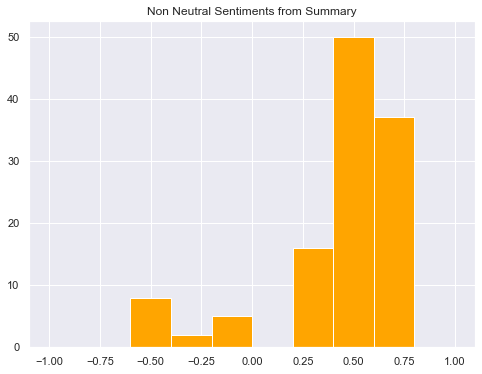

In [90]:
# Visualise the distribution of the sentiment analysis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values with break at 0
cust_reviews['summary_sentiment_score'].hist(bins=[-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1],
             ax=ax,
             color="orange")

plt.title("Non Neutral Sentiments from Summary")
plt.show()

# This is also disappointing given out of 2000 reviews, only 135 or so reviews return non neutral sentiments

### Identify the top 20 postive & negative reviews and summaries

As Vader library produced a very small number of non neutral sentiments, I will use an alternative sentiment analysis library to explore polarity further. This library is less sophesticated but could be more suited to this task given the previous library is more focused on social media content.

In [91]:
# Define polarity/sentiment
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [92]:
# Determine Polarity of Reviews & Summary
cust_reviews['polarity_review'] = cust_reviews['review'].apply(generate_polarity)
cust_reviews['polarity_summary'] = cust_reviews['summary'].apply(generate_polarity)

In [93]:
# View Summary of key stats of Polarity_reviews
cust_reviews['polarity_review'].describe()

count    2000.000000
mean        0.179341
std         0.274729
min        -1.000000
25%         0.000000
50%         0.149468
75%         0.344122
max         1.000000
Name: polarity_review, dtype: float64

In [94]:
# View Summary of key stats of Polarity_summary
cust_reviews['polarity_summary'].describe()

count    2000.000000
mean        0.170160
std         0.315419
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.316667
max         1.000000
Name: polarity_summary, dtype: float64

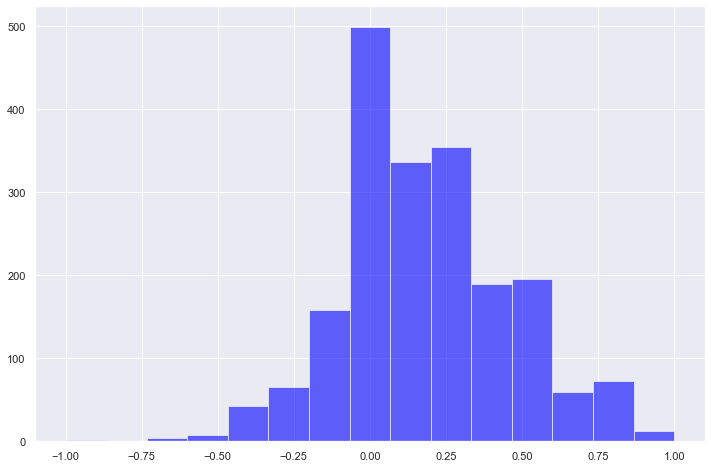

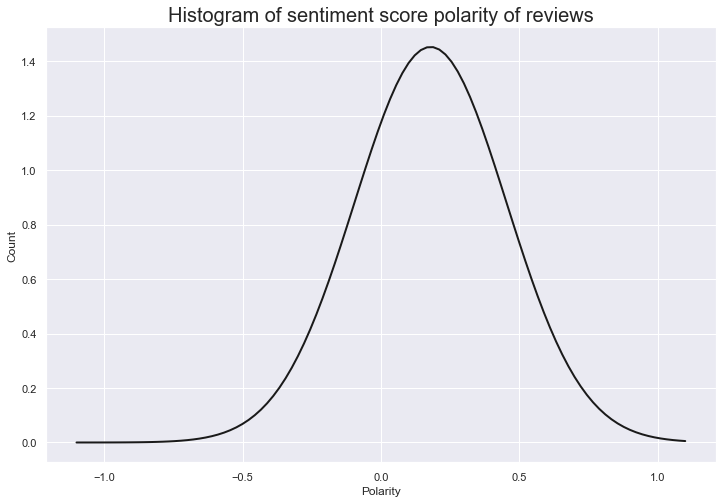

In [95]:
# Visualising polarity of Reviews
# Histogram of polarity
num_bins = 15
plt.hist(cust_reviews['polarity_review'], num_bins, facecolor='blue', alpha=0.6)

# Histogram of sentiment score
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(cust_reviews['polarity_review']) 
p = norm.pdf(x, mu, std)
plt.figure(figsize=(12, 8))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of reviews', fontsize=20)
plt.show()

# Better output compared to Vader although still shows that majority of reviews are neutral or close to neutral

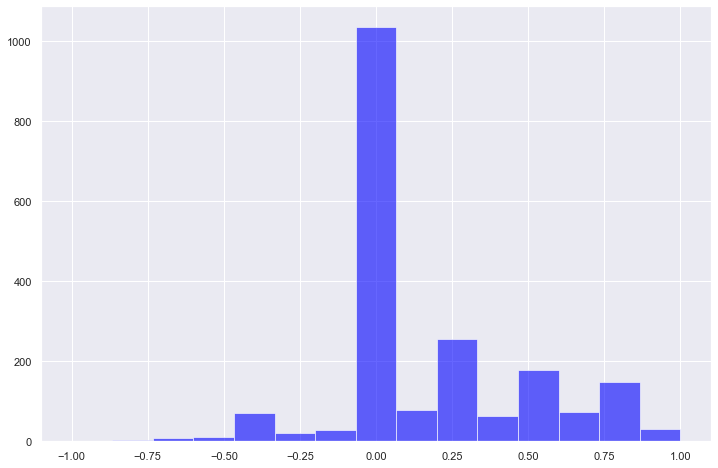

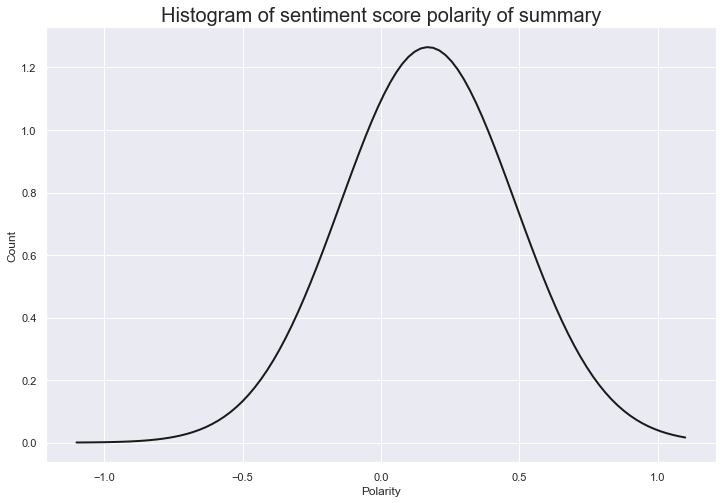

In [96]:
# Visualising polarity of Summary
# Histogram of polarity
num_bins = 15
plt.hist(cust_reviews['polarity_summary'], num_bins, facecolor='blue', alpha=0.6)

# Histogram of sentiment score
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(cust_reviews['polarity_summary']) 
p = norm.pdf(x, mu, std)
plt.figure(figsize=(12, 8))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of summary', fontsize=20)
plt.show()

# Better output compared to Vader as also seen by the descriptive stats.

In [97]:
# Top 20 negative reviews.
negative_sentiment_review = cust_reviews.nsmallest(20, 'polarity_review')
negative_sentiment_review_fin = negative_sentiment_review[['review',  'polarity_review']]
negative_sentiment_review_fin.style.set_properties(subset=['review'], **{'width':'1200px'})

# View output.
print(negative_sentiment_review_fin)

                                                 review  polarity_review
173    horrible\nnoth say\nwould give zero star possibl        -1.000000
382   wonder tool use work children anger manag symp...        -0.700000
400      realli help addr learn discuss anger construct        -0.700000
451                 excel product use client anger issu        -0.700000
526   keep client engag help develop anger manag ski...        -0.700000
364   one staff use game soon dont know well work ye...        -0.550000
411   realli like game help kid recogn anger talk di...        -0.533333
4     review gf previou screen complet unnecessari n...        -0.500000
117   bought christma gift grandson sticker book go ...        -0.500000
174   sent product granddaught pompom maker come two...        -0.500000
227                   gift daughter found difficult use        -0.500000
301                                           difficult        -0.500000
1620  think puppet doll still work need way get ani

In [98]:
# Top 20 postive reviews.
positive_sentiment_review = cust_reviews.nlargest(20, 'polarity_review')
positive_sentiment_review_fin = positive_sentiment_review[['review',  'polarity_review']]
positive_sentiment_review_fin.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
print(positive_sentiment_review_fin)

                                                 review  polarity_review
7                                   came perfect condit         1.000000
524                                       perfect order         1.000000
573                    ador perfect book cant wait gift         1.000000
579   arriv time perfect condit ador give book name ...         1.000000
790                                             perfect         1.000000
1244  lot piec come set work realli well expand fles...         1.000000
1548  alway perfect littl gift wife student reward c...         1.000000
1609              perfect go  bean bag wish separ order         1.000000
1720                 best thing play also mind blow way         1.000000
1967                       perfect tutor grandson spell         1.000000
1373  one best frankli necessari add on like waterde...         0.933333
655   great price puzzl best part carri case take wi...         0.900000
662   great puzzl toddler put togeth puzzl best qua

In [99]:
# Top 20 negative summaries.
negative_sentiment_summary = cust_reviews.nsmallest(20, 'polarity_summary')
negative_sentiment_summary_fin = negative_sentiment_summary[['summary',  'polarity_summary']]
negative_sentiment_summary_fin.style.set_properties(subset=['summary'], **{'width':'1200px'})

# View output.
print(negative_sentiment_summary_fin)

                                              summary  polarity_summary
21                           worst valu ive ever seen         -1.000000
1     anoth worthless dungeon master screen galeforce         -0.800000
1166                 hate run rpg campaign deal town          -0.800000
441                  excel childrenadolesc anger issu         -0.700000
885                                        bad expect         -0.700000
890                          bad qualityal made paper         -0.700000
1161                             bad set limit applic         -0.700000
480                bingo mad dragon awesom learn tool         -0.625000
490                             mad dragon make happi         -0.625000
518                                        mad dragon         -0.625000
364                                anger control game         -0.550000
530                                anger control game         -0.550000
1008            bought game base advertis anoth game          -0

In [100]:
# Top 20 positive summaries.
positive_sentiment_summary = cust_reviews.nlargest(20, 'polarity_summary')
positive_sentiment_summary_fin = positive_sentiment_summary[['summary',  'polarity_summary']]
positive_sentiment_summary_fin.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
print(positive_sentiment_summary_fin)

                                         summary  polarity_summary
6                            best gm screen ever               1.0
32                                       perfect               1.0
38                           stain glass perfect               1.0
80           theyr perfect size keep car diaper                1.0
134                            perfect preschool               1.0
418                                      perfect               1.0
580          pigeon perfect addit school librari               1.0
599                       best easter teach tool               1.0
662                                 best qualiti               1.0
731                                best feedback               1.0
756   perfect tool learn tell time one one child               1.0
870                                     one best               1.0
980                       best among dd boardgam               1.0
997                                best one seri              